# Final Project
**Melissa Stone Rogers** 

[GitHub Project Repository](https://github.com/meldstonerogers/datafun-07-ml)



In [47]:
#import statements
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pyarrow as pa
import numpy as np
import scipy
import sklearn

## Part 1 - Chart a Straight Line

### Linear Relationship, Plotting Celsius vs Fahrenheit

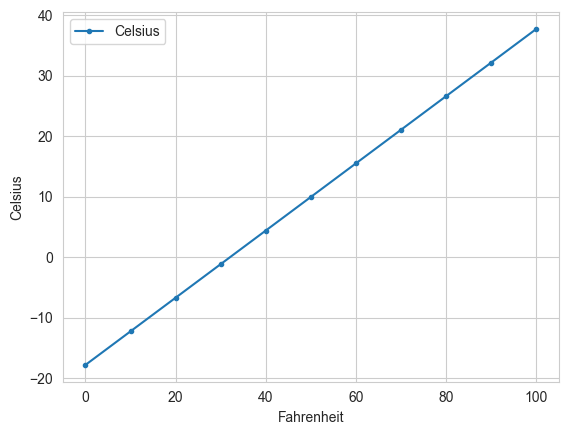

In [48]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
import pandas as pd
import matplotlib.pyplot as plt
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Aquistion 

In [49]:
#load dataset 
df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')


### Section 2 - Data Inspection

In [50]:
#Get sense of the data
df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [51]:
#Get sense of the data
df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [52]:
#improve column name 
df.columns = ['Date', 'Temperature', 'Anomaly']
df.head()

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [53]:
#check column type
df.Date.dtype

dtype('int64')

In [54]:
#truncate last two digits
df.Date = df.Date.floordiv(100)

df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [55]:
#Set the precision for floating point numbers, updated from textbook code due to error
pd.set_option('display.precision', 2)

In [56]:
#use descriptive statistics
df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [57]:
from scipy import stats
linear_regression = stats.linregress(x=df.Date, y=df.Temperature)

print(f'Statistics:' , stats.linregress(x=df.Date, y=df.Temperature))


Statistics: LinregressResult(slope=0.014771361132966163, intercept=8.694993233674289, rvalue=0.1169376670075292, pvalue=0.19586679787456207, stderr=0.011357855112603288, intercept_stderr=22.22536216679513)


In [58]:
linear_regression.slope
linear_regression.intercept

print(f'Slope:', linear_regression.slope)
print(f'Intercept:', linear_regression.intercept)


Slope: 0.014771361132966163
Intercept: 8.694993233674289


### Section 6 - Predict

In [59]:
linear_regression.slope*2024+linear_regression.intercept
print(f'Predicted Average Temperature 2024:', linear_regression.slope*2024+linear_regression.intercept)

Predicted Average Temperature 2024: 38.5922281667978


### Section 7 - Visualizations

(10.0, 70.0)

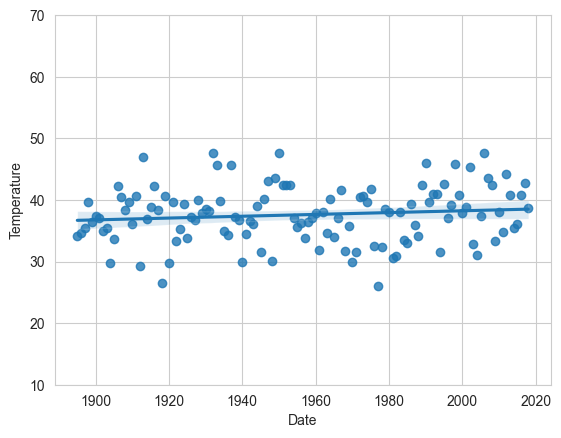

In [60]:
import seaborn as sns
sns.set_style('whitegrid')
axes=sns.regplot(x=df.Date, y=df.Temperature)
axes.set_ylim(10, 70)

## Part 3 - Prediction

### Section 1 - Build the Model

In [61]:
#use test_train_split to split the data into parts for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Date.values.reshape(-1, 1), df.Temperature.values, random_state=11)

In [63]:
#check the shape of each data set
X_train.shape
X_test.shape

print(f'X_train shape check' , X_train.shape)
print(f'X_test shape check' , X_test.shape)

X_train shape check (93, 1)
X_test shape check (31, 1)


In [64]:
#train the model using Linear Regression Fit
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)


LinearRegression()

In [66]:
#determine coefficient and intercept
linear_regression.coef_
linear_regression.intercept_

print(f'Coefficient:', linear_regression.coef_)
print(f'Intercept:', linear_regression.intercept_)

Coefficient: [0.01939167]
Intercept: -0.30779820252656265


### Section 2 - Test the Model

In [67]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'Predicted: {p:.2f}, Expected: {e:.2f}')

Predicted: 37.86, Expected: 31.70
Predicted: 38.69, Expected: 34.80
Predicted: 37.00, Expected: 39.40
Predicted: 37.25, Expected: 45.70
Predicted: 38.05, Expected: 32.30
Predicted: 37.64, Expected: 33.80
Predicted: 36.94, Expected: 39.70


### Section 3 - Predict 

In [76]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
predict(2024)

print(f'Predicted Average Temperature 2024:', predict(2024))

Predicted Average Temperature 2024: [38.94094855]


### Section 3 - Visualizations

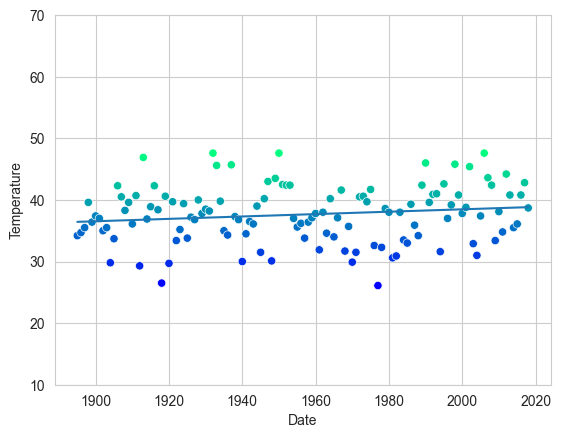

In [78]:
#visualize data with regression line
import seaborn as sns
axes = sns.scatterplot(data=df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)

x = np.array([min(df.Date.values), max(df.Date.values)])
y = predict(x)
line = plt.plot(x, y)

## Part 4 - Insights

Both methods produced similar visualizations, though the second method may be deemed more aesthetically pleasing, if that is of importance to you. Using typical statistical methods seemed effective for this data set. Machine learning could be particularly beneficial for very large data sets, and it has the possibility of automation, though that was not needed here necessarily. For the purpose of this project, working within both methods was a helpful learning opportunity. 